In [2]:
!pip install opencv-python pillow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install --upgrade pip


  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [10]:
from PIL import Image
img_pil = Image.open("C:/Users/bbuser/Downloads/image.jpg")
print(f"PIL Image format:{img_pil.format},size:{img_pil.size}, mode:{img_pil.mode}")

PIL Image format:JPEG,size:(5475, 3775), mode:RGB


## Load and View a Grayscale Image

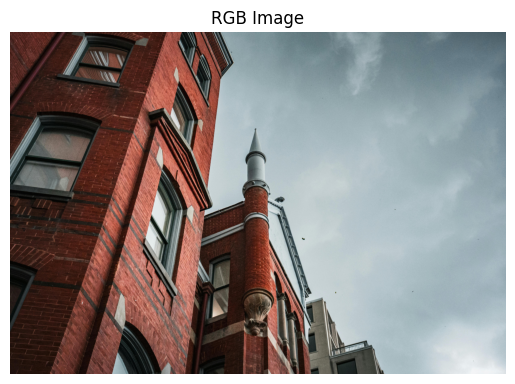

In [12]:
import matplotlib.pyplot as plt

plt.imshow(img_pil)
plt.title('RGB Image')
plt.axis('off')
plt.show()

In [17]:
import cv2
import numpy as np



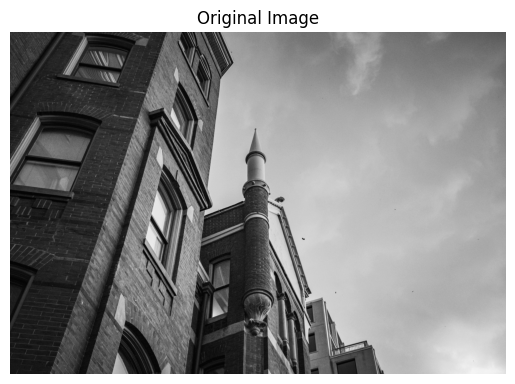

Shape: (3775, 5475)
Data type: uint8
Pixel range: 0 to 255


In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('C:/Users/bbuser/Downloads/image.jpg', cv2.IMREAD_GRAYSCALE)

# Display image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


print("Shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", img.min(), "to", img.max())


In [18]:
img_cv =cv2.imread("C:/Users/bbuser/Downloads/image.jpg")
img_cv

array([[[ 47,  52,  97],
        [ 43,  48,  93],
        [ 27,  32,  77],
        ...,
        [116, 102,  83],
        [113,  98,  79],
        [108,  93,  74]],

       [[ 47,  52,  97],
        [ 42,  47,  92],
        [ 30,  35,  80],
        ...,
        [105,  91,  72],
        [105,  90,  71],
        [104,  89,  70]],

       [[ 41,  46,  91],
        [ 36,  41,  86],
        [ 31,  36,  81],
        ...,
        [104,  90,  71],
        [106,  92,  73],
        [109,  95,  76]],

       ...,

       [[ 11,  14,  28],
        [ 11,  14,  28],
        [ 12,  15,  29],
        ...,
        [233, 230, 225],
        [233, 230, 225],
        [233, 230, 225]],

       [[ 12,  15,  29],
        [ 12,  15,  29],
        [ 14,  17,  31],
        ...,
        [235, 232, 227],
        [235, 232, 227],
        [235, 232, 227]],

       [[ 11,  14,  28],
        [ 13,  16,  30],
        [ 16,  19,  33],
        ...,
        [232, 229, 224],
        [232, 229, 224],
        [232, 229, 224]]

What I noticed: The image showed up in black and white. The array was just numbers between 0 and 255. Shape showed the height and width in pixels.

Did it match my expectations? Yes, because grayscale images are just brightness values.

Under the hood: The image is stored as a 2D NumPy array where each number is a pixel’s brightness.

Real use: This is how computers see and process images before adding colors or effects.

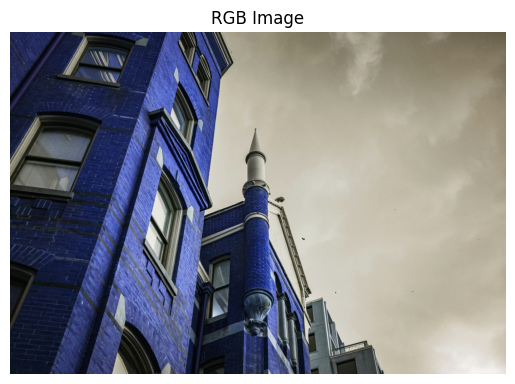

In [19]:
plt.imshow(img_cv)
plt.title('RGB Image')
plt.axis('off')
plt.show()

What I noticed: The whole image got with diffrent color.

Did it match my expectations? NO, I did not expecte the color will be change.


# Brighten the Image (+50)

In [ ]:
img_rgd = cv2.cvtColor(img_cv,)

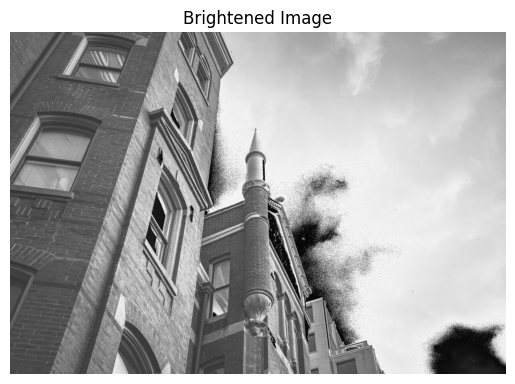

In [23]:
bright = img + 50
plt.imshow(bright, cmap='gray')
plt.title("Brightened Image")
plt.axis('off')
plt.show()

What I noticed: The whole image got lighter. Dark areas became more visible, and bright areas got brighter.

Did it match my expectations? Yes, except when pixels overflow past 255, they wrap around and cause weird effects.

Under the hood: Adding a value increases every pixel’s brightness, but in uint8 format, values above 255 loop back to 0.

Real use: Brightening is used in image editing and preprocessing to enhance visibility in low-light photos.

# Add a Higher Value (+300)

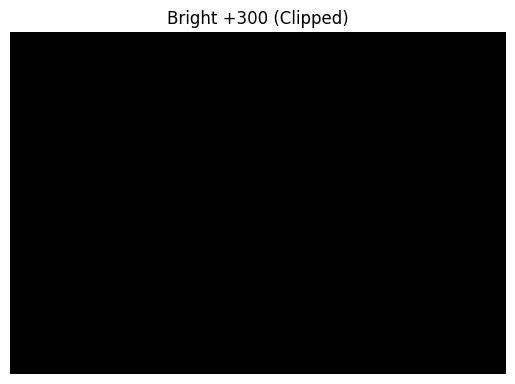

In [44]:
bright_high_clip = np.clip(img.astype(np.int32) + 300, 0, 255).astype(np.uint8)

bright_high = img.astype(np.int32) + 300  # without clipping (will overflow visually)
bright_high = bright_high.astype(np.uint8)

plt.imshow(bright_high_clip, cmap='gray')
plt.title("Bright +300 (Clipped)")
plt.axis('off')
plt.show()



What I noticed: The image looked weird — some bright areas became dark because of overflow.

Did it match my expectations? No, I expected it to be super bright, but it broke because of pixel wrapping.

Under the hood: Adding +300 to uint8 pixels causes many values to loop multiple times through 0–255 range.

Real use: This is why we use np.clip() to keep values within 0–255 when enhancing images.

# Subtract to Darken

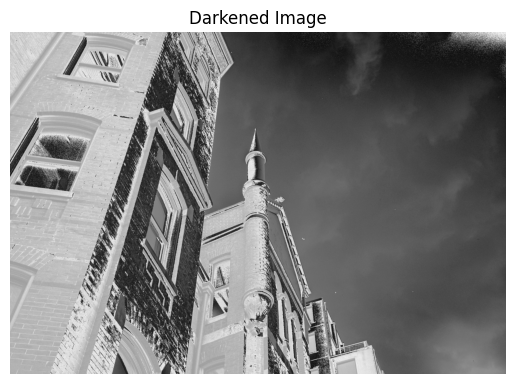

In [28]:
dark = img - 100
plt.imshow(dark, cmap='gray')
plt.title("Darkened Image")
plt.axis('off')
plt.show()



What I noticed: The image got darker, but some parts went completely black.

Did it match my expectations? Kind of, but I didn’t expect some areas to lose all detail.

Under the hood: Subtracting reduces brightness. If values go below 0 in uint8, they wrap around and become bright again unless clipped.

Real use: Used to reduce brightness or create moodier tones in photos.

# Transpose the Image

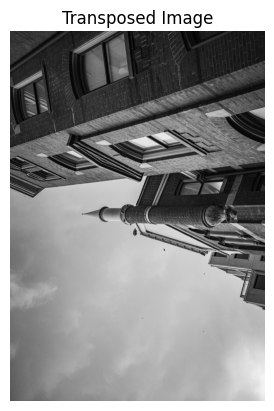

In [29]:
transposed = img.T
plt.imshow(transposed, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.show()


What I noticed: The image looked like it was flipped diagonally — top became left, left became top.

Did it match my expectations? Yes, it felt like rotating 90° and also flipping.

Under the hood: .T swaps rows and columns, so pixels change positions diagonally.

Real use: Used in image processing when working with matrix math, or to rotate without interpolation.

# Flip Horizontally and Vertically

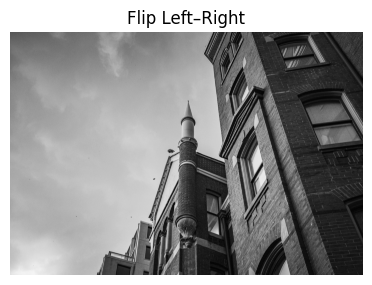

In [34]:
flip_lr = np.fliplr(img)   # Left–Right


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(flip_lr, cmap='gray')
plt.title("Flip Left–Right")
plt.axis('off')



plt.show()



What I noticed: Left–right flip mirrored the image, up–down flip turned it upside down.

Did it match my expectations? Yes, exactly how a mirror and flipping a page would work.

Under the hood: np.fliplr() reverses column order, np.flipud() reverses row order.

Real use: Data augmentation in AI models, or making mirror effects in design

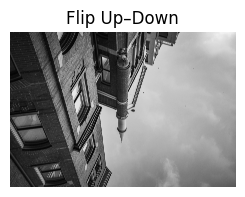

In [33]:
flip_ud = np.flipud(img)   # Up–Down
plt.subplot(1, 2, 2)
plt.imshow(flip_ud, cmap='gray')
plt.title("Flip Up–Down")
plt.axis('off')

plt.show()

#  Slice (Crop)

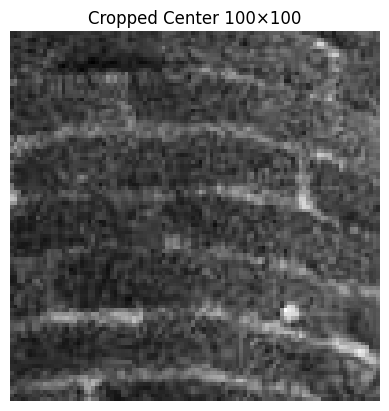

In [35]:
h, w = img.shape
crop_center = img[h//2-50:h//2+50, w//2-50:w//2+50]  # 100x100 from center

plt.imshow(crop_center, cmap='gray')
plt.title("Cropped Center 100×100")
plt.axis('off')
plt.show()



What I noticed: Only the middle square part of the image was shown. The rest of the image was gone.

Did it match my expectations? Yes, cropping worked exactly as I thought.

Under the hood: NumPy slicing picks a specific range of rows and columns from the image array.

Real use: Cropping is used when I want to focus on a specific area, like a face in a photo, or remove unnecessary background.


# Negative Image

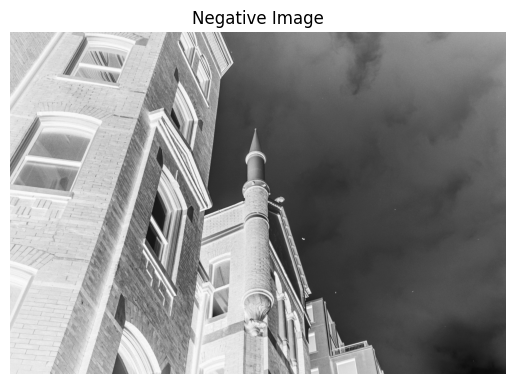

In [36]:
negative_img = 255 - img

plt.imshow(negative_img, cmap='gray')
plt.title("Negative Image")
plt.axis('off')
plt.show()


What I noticed: The colors flipped — dark areas became light, and light areas became dark.

Did it match my expectations? Yes, because subtracting from 255 should invert the brightness.

Under the hood: For each pixel value, it does 255 - pixel, reversing brightness levels.

Real use: This is useful for analyzing certain details in medical images or creating special effects

# Rotate Image

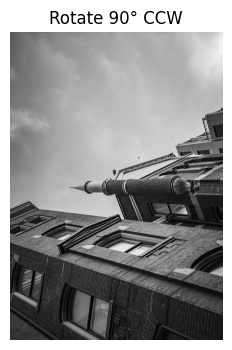

In [37]:
rotate_90 = np.rot90(img, k=1)     # 90° counterclockwise
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rotate_90, cmap='gray')
plt.title("Rotate 90° CCW")
plt.axis('off')

plt.show()

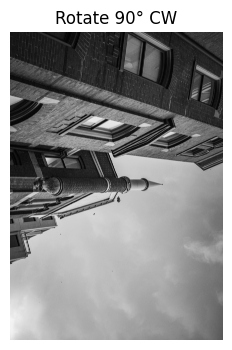

In [38]:
rotate_minus90 = np.rot90(img, k=-1) # 90° clockwise
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.imshow(rotate_minus90, cmap='gray')
plt.title("Rotate 90° CW")
plt.axis('off')

plt.show()

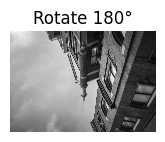

In [39]:
rotate_180 = np.rot90(img, k=2)    # 180°
plt.subplot(1, 3, 3)
plt.imshow(rotate_180, cmap='gray')
plt.title("Rotate 180°")
plt.axis('off')

plt.show()

What I noticed: Rotating by 90° counterclockwise turned the image sideways. Rotating by -90° did the opposite. Rotating 180° flipped it upside down.

Did it match my expectations? Yes, they all rotated the way I thought.

Under the hood: np.rot90() reorders the rows and columns to create a rotated version without distorting pixels.

Real use: Rotations are common in preprocessing datasets where images come in different orientations.

# Combine Multiple Transformations

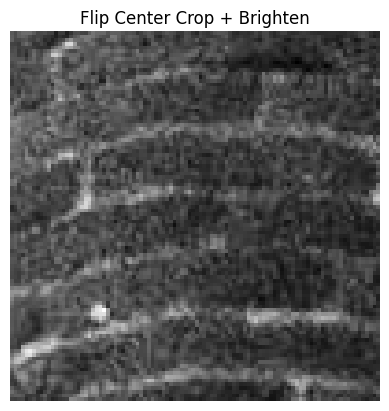

In [40]:
combo_transform = np.clip(np.fliplr(crop_center) + 50, 0, 255)

plt.imshow(combo_transform, cmap='gray')
plt.title("Flip Center Crop + Brighten")
plt.axis('off')
plt.show()


What I noticed: It took the cropped center, flipped it left–right, and made it brighter. Looked like a mirrored bright zoom-in.

Did it match my expectations? Yes, but I realized the order matters — flipping before brightening vs. brightening before flipping can give different outputs.

Under the hood: NumPy applies operations step by step to the pixel values in the cropped region.

Real use: This is how image filters or creative edits are made — by stacking operations.

# Bonus: Collage

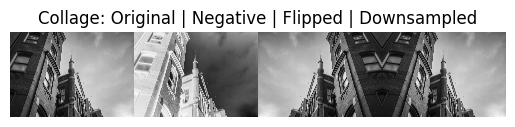

In [41]:
neg = 255 - img
flip = np.fliplr(img)
downsample = img[::2, ::2]

# Resize downsample to match original size for collage
downsample_resized = cv2.resize(downsample, (img.shape[1], img.shape[0]))

# Create collage
collage = np.hstack((img, neg, flip, downsample_resized))

plt.imshow(collage, cmap='gray')
plt.title("Collage: Original | Negative | Flipped | Downsampled")
plt.axis('off')
plt.show()
